# Multi armed bandit (MAB)

## what is exploitation vs exploration
The exploitation vs exploration dilemma exists in many aspects of our life. Say, your favorite restaurant is right around the corner. If you go there every day, you would be confident of what you will get. **this is an example of exploitation**.

however In doing that you miss the chance of discovering an even better option. If you try new places all the time, it is very likely you are gonna have to eat unpleasant food from time to time but there is also a chance you can find a new better restaurant. **this is an example of exploration**.

## what is MAB basic explanation
the MAB Problem is a classic problem that is often used to demonstrate the exploration vs exploitation trade off. 

Imagine you are at a casino facing multiple slot machines(one armed bandits) each is configured differently and have different chances to win and different payouts.  
**the question is:** what is the best slot machine to play for the highest long term rewards.  
**that is the problem of the MAB**
!['text'](https://miro.medium.com/max/1400/1*Tt8A6mP98ibBlrlFD5UJxg.png)
link: https://miro.medium.com/max/1400/1*Tt8A6mP98ibBlrlFD5UJxg.png

## what is MAB scientific explanation
it is a simplified verion of the Markov decision process, as there is no state

MAB can be described as a tuple of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo fence="false" stretchy="false">&#x27E8;<!-- ⟨ --></mo>
  <mrow class="MJX-TeXAtom-ORD">
    <mi class="MJX-tex-caligraphic" mathvariant="script">A</mi>
  </mrow>
  <mo>,</mo>
  <mrow class="MJX-TeXAtom-ORD">
    <mi class="MJX-tex-caligraphic" mathvariant="script">R</mi>
  </mrow>
  <mo fence="false" stretchy="false">&#x27E9;<!-- ⟩ --></mo>
</math> where:  
* We have **K** machines with reward probabilities, {θ1,…,θK}.
  
  
* At each time step **t**, we take an action **A** on one slot machine and receive a reward **R**.
  
  
* **A** is a set of actions, each referring to the interaction with one slot machine. The value of action a is the expected reward, Q(a)=E[r|a]=θ. If action at at the time step t is on the i-th machine, then Q(at)=θi.
  
  
* **R** is a reward function. In the case of Bernoulli bandit, we observe a reward r in a stochastic fashion. At the time step t, rt=R(at) may return reward 1 with a probability Q(at) or 0 otherwise.

## MAB strategies
Based on how we do exploration there are several ways to solve MAB some of them include
* No exploration: this is a bad approach and the most niave one
* Exploration at random 
* Exploration smartly wih preferance to uncertainty

## Epsilon Greedy algorithm (ε-Greedy)
The ε-greedy algorithm takes the best action most of the time, but does random exploration occasionally. The action value is estimated according to the past experience by averaging the rewards associated with the target action a that we have observed so far (up to the current time step t):

**Q^t(a)=1Nt(a)∑τ=1trτ1[aτ=a]**

where 1 is a binary indicator function and  **Nt(a)** is how many times the action **a** has been selected so far, **Nt(a)=∑tτ=11[aτ=a]**.

According to the ε-greedy algorithm, with a small probability **ε** we take a random action, but otherwise (which should be most of the time, probably **1-ε**)) we pick the best action learnt so far **a^∗t=argmaxa∈AQ^t(a)**. 

## here I try to implement ε-Greedy
### first importing the required library 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

### defining the bandit arms

In [10]:
def T1():
    score = 0
    chance = np.random.randint(1,101)
    if chance <= 25:
        score += 1000
    else:
        score += 10
    return score
def T2():
    score = 0
    chance = np.random.randint(1,101)
    if chance <= 25:
        score += 200
    else:
        score += 20
    return score
def T3():
    score = 0
    chance = np.random.randint(1,101)
    if chance <= 25:
        score += 300
    return score
def T4():
    score = 0
    score += 25
    return score

Arm_dict = {1:T1,2:T2,3:T3,4:T4}

### getting the baseline score

In [11]:
"""
getting the baseline score of each arm this will be used to find the best arm to pull at first
"""
def baseline(n_trails, arm_dict):
    #creating the scoring tracker
    times_arm_pulled, arm_scores = {}, {}
    for i in Arm_dict.keys():
        times_arm_pulled[i], arm_scores[i] = 0, 0
    
    while n_trails:
        n_trails -= 1 
        #pulling arms
        for i in arm_dict.keys():

            #setting arm selection 
            arm_pulled = i
            pulling_score = arm_dict[i]()

            #scoring metric
            times_arm_pulled[arm_pulled] += 1
            arm_scores[arm_pulled] += pulling_score

    return arm_scores, times_arm_pulled

### defining the ε-Greedy algorithm

In [12]:
def epsilon_greedy(n_trails, explore_rate, choices, baseline_trails=1):
    """
    will try to maximize the score by choosing the best arm to pull while exploring other arms
    _______________________________________________________________________________________________
    
    n_trails: is the number of times this will loop
    
    explore_rate: is the Percentage of time it will choose something other than the best option
    
    choices: a dictionary of the scoring functions
    
    baseline_trails: how many times the arms must be pulled before the choser will start deciding whats best
    """
    #getting the baseline metrics for the chooser
    arm_scores, times_arm_pulled= baseline(baseline_trails, choices)
    score_per_trail = []
    
    #creating a way to track the long term average score
    percentage_over_time = {}
    for i in arm_scores.keys():
        percentage_over_time[i] = []
    
    #creating a way to track what arm is pulled throughout each loop
    arm_pulled_over_time = []
    
    while n_trails:
        n_trails -= 1
        
        #generate the current best arm to pull based on avg score
        percentage = {}
        for i in arm_scores.keys():
            percentage[i] = arm_scores[i]/times_arm_pulled[i]
        
        #exploring
        if np.random.random() <= explore_rate:
            #generating a temparary dic so the best scoring arm wont be pulled
            temp_d = percentage.copy()
            del temp_d[max(temp_d, key=lambda k: temp_d[k])]
            
            #setting which arm is pulled
            arm_pulled = np.random.choice(list(temp_d.keys()))
            
            #setting the score that arm gives
            choice_score = choices[arm_pulled]()
            
            #updating the the arm scores and times arm pulled to update the best average arm
            arm_scores[arm_pulled] += choice_score
            times_arm_pulled[arm_pulled] += 1
            
            #tracking the scoring
            score_per_trail.append(choice_score)
            arm_pulled_over_time.append(arm_pulled)
        
        #exploiting the curruntly best scoring arm 
        else:
            #finding the best arm
            arm_pulled = max(percentage, key=lambda k: percentage[k])
            #setting the score for the best arm
            choice_score = choices[arm_pulled]()
            #updating the arm scores and times arm pulled to update the best average arm
            arm_scores[arm_pulled] += choice_score
            times_arm_pulled[arm_pulled] += 1
            #tracking the scoring
            score_per_trail.append(choice_score)
            arm_pulled_over_time.append(arm_pulled)
        
        # updating the average scoring of the arms to track the best arm
        for key, value in percentage.items():
            percentage_over_time[key].append(value)
    
    #finding the grand total score
    grand_score = sum(score_per_trail)
    
    #creating the accumulating score
    score_over_time = []
    for i in score_per_trail:
        if len(score_over_time) == 0:
            score_over_time.append(i)
        else:
            score_over_time.append(i+score_over_time[-1])

    return score_per_trail, score_over_time,  grand_score, percentage_over_time, arm_pulled_over_time

In [13]:
score_per_trail, score_over_time, grand_score, percentage_over_time, arm_pulled_over_time = epsilon_greedy(200, .1, Arm_dict)

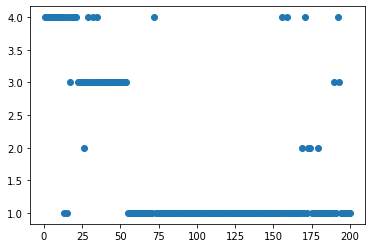

In [14]:
plt.scatter(range(1,len(arm_pulled_over_time)+1),arm_pulled_over_time)

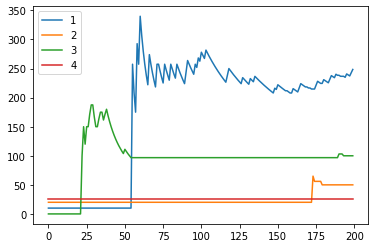

In [15]:
fig, ax = plt.subplots()
for i in percentage_over_time:    
    ax.plot(percentage_over_time[i], label=i)
leg = ax.legend();

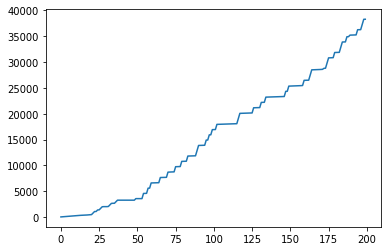

In [16]:
plt.plot(score_over_time)

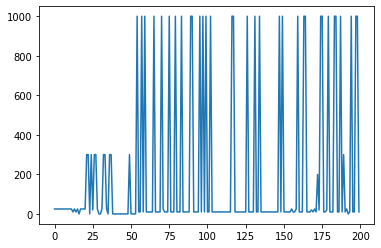

In [17]:
plt.plot(score_per_trail)